# Selection of starting high and low topographies for CASCADE CNH

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import csv

sys.path.extend(['/Users/KatherineAnardeWheels/PycharmProjects/Barrier3D', '/Users/KatherineAnardeWheels/PycharmProjects/brie', '/Users/KatherineAnardeWheels/PycharmProjects/CASCADE'])

import scripts.CASCADE_plotters as cplt

datadir = "/Users/KatherineAnardeWheels/Research/BARis/UNC/CNH/CASCADE_save_dir/Run_Output/"

## High dune growth rate (r_ave=0.75)

Use storm sequence #4 (doesn't drown over 10k years), find the maximum and minimum average interior elevations, and save the barrier topographies corresponding to these time periods. Start with the run output from the 0.75 average dune growth rate.

NOTE: The plotter used below can be used to plot Roadway Mangement statistics as well, so some plots show up as blank for natural runs.

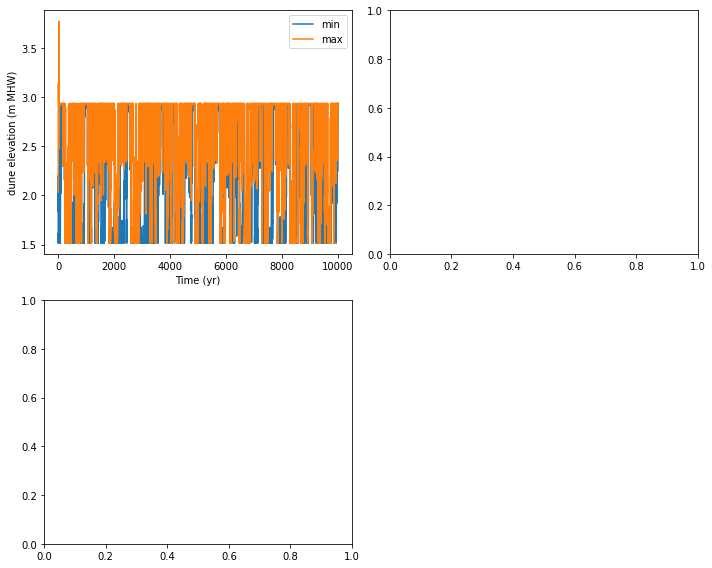

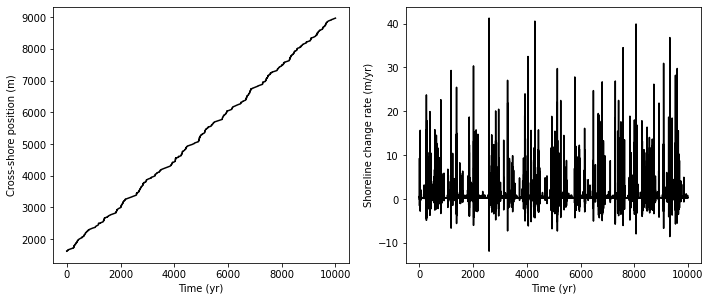

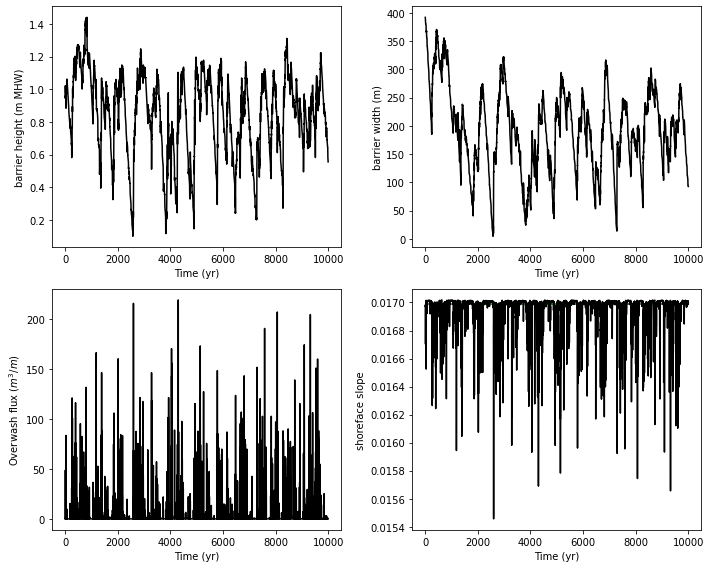

In [3]:
ib3d = 0
tmin = 0
tmax = 10000

name_prefix = "4-B3D_noAST_Rave_pt75_SLR_pt004_10k-yrs_04"
output = np.load(datadir + name_prefix + ".npz", allow_pickle=True)
cascade = output["cascade"][0]
(
    BarrierWidth_75,
    DuneCrestMean_75,
    BarrierHeight_75,
    bw_rate_75,
    bh_rate_75,
    sc_rate_75,
    DuneCrestMin_75,
    DuneCrestMax_75,
    shoreline_position,
    shoreface_slope,
    overwash,
) = cplt.plot_nonlinear_stats_RoadwayManager(cascade.barrier3d, ib3d, tmax, tmax)

In looking at the max dune height, I found it weird that there was such a large dune elevation -- about the natural equilibrium elevation -- around 30 years. So I decided to take a look at the gif. The gif showed that at 31 years, a high interior cell was absorbed into the dune line when the shoreline migrated. Mystery solved.

NOTE: the quality of the gif is always bad when it is generated through a Jupyter Notebook. I haven't been able to fix this.

In [ ]:
# just plot the first 40 years
cplt.plot_ElevAnimation_CASCADE(
    cascade,
    ny=1,
    directory = "/Users/KatherineAnardeWheels/PycharmProjects/CASCADE/",
    TMAX_MGMT=40,
    name='test_on_dune_spike',
    TMAX_SIM=40,
    beach_management_ny=[False],  # list of booleans
    roadway_management_ny=[False],
    y_lim=[150, 250],
    z_lim=4.0,
    fig_size=None,
    fig_eps=False,
)

Ok, now that we are confident with these runs, lets return to choosing a starting elevation for the human dynamics modules.

In [4]:
print("min barrier elevation = " + str(np.min(BarrierHeight_75)) + " m MHW") 
i_min_pt75 = np.argmin(BarrierHeight_75)
print("index = " + str(i_min_pt75)) 
print("corresponding barrier width = " + str(BarrierWidth_75[i_min_pt75]) + " m") 
print("-------------") 
print("max barrier elevation = " + str(np.max(BarrierHeight_75)) + " m MHW") 
i_max_pt75 = np.argmax(BarrierHeight_75)
print("index = " + str(i_max_pt75)) 
print("corresponding barrier width = " + str(BarrierWidth_75[i_max_pt75]) + " m") 

min barrier elevation = 0.09914382205927137 m MHW
index = 2574
corresponding barrier width = 4.6000000000000005 m
-------------
max barrier elevation = 1.4409873670636313 m MHW
index = 829
corresponding barrier width = 311.0 m


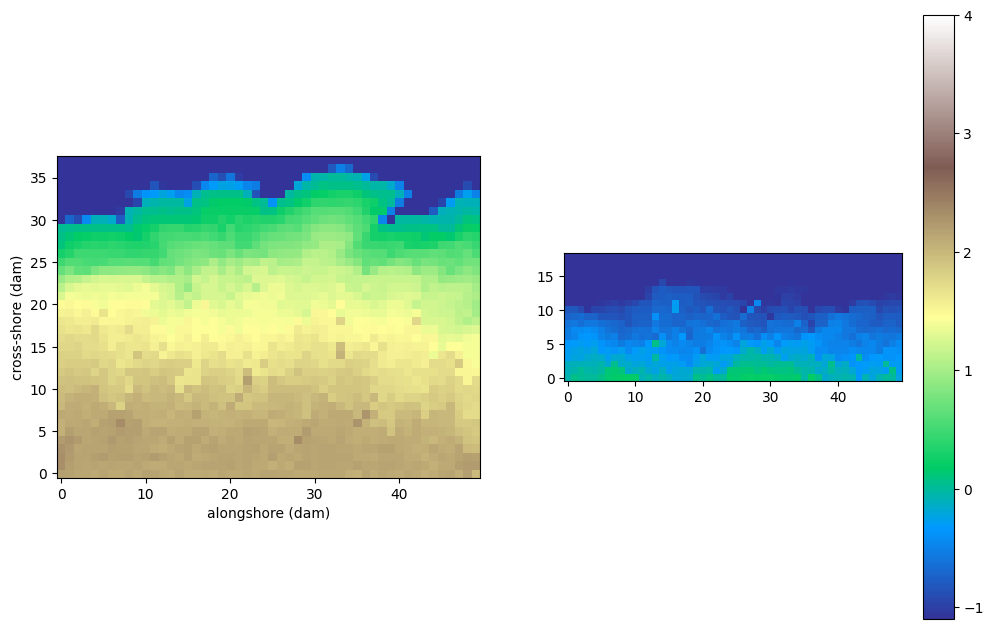

In [4]:
fig=plt.figure(figsize=(12,8), dpi= 100)
plt.subplot(1,2,1)
plt.imshow(
    cascade.barrier3d[0]._DomainTS[i_max_pt75] * 10,
    origin="lower",
    cmap="terrain",
    vmin=-1.1,
    vmax=4.0,
)
plt.xlabel("alongshore (dam)")
plt.ylabel("cross-shore (dam)")

plt.subplot(1,2,2)
plt.imshow(
    cascade.barrier3d[0]._DomainTS[i_min_pt75] * 10,
    origin="lower",
    cmap="terrain",
    vmin=-1.1,
    vmax=4.0,
)
plt.colorbar()

So the minimum interior elevation cannot support a roadway because the roadway borders "water" cells immediately upon construction (0 m NAVD88 in the code is the bay drowning threshold). I'm just going to have to explain this in the text. Instead, we chose another low elevation, at index 1353, which is significantly higher in elevation behind the dune line and a slightly wider barrier island (more realistic for initial roadway construction or dune management to maintain a roadway).

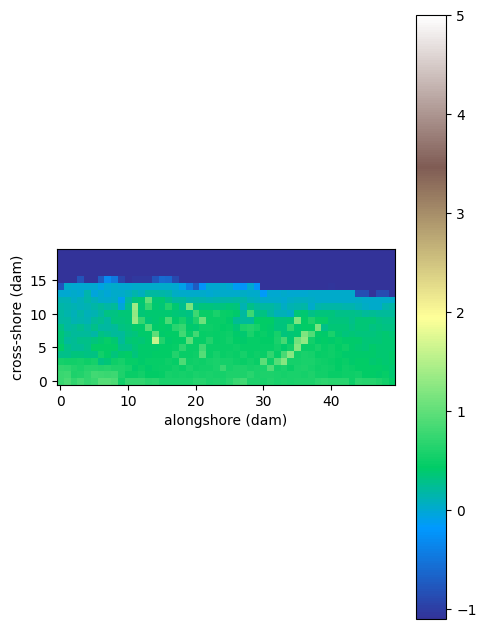

In [21]:
fig=plt.figure(figsize=(12,8), dpi= 100)

# i_min_pt75 = 8282
# i_min_pt75 = 1353
# i_min_pt75 = 1826
# i_min_pt75 = 4023
# i_min_pt75 = 4261
# i_min_pt75 = 5783
# i_min_pt75 = 6490
# i_min_pt75 = 7812
# i_min_pt75 = 3284
# i_min_pt75 = 4763
# i_min_pt75 = 9060
i_min_pt75 = 6481

plt.subplot(1,2,1)
plt.imshow(
    cascade.barrier3d[0]._DomainTS[i_min_pt75] * 10,
    origin="lower",
    cmap="terrain",
    vmin=-1.1,
    vmax=5.0,
)
plt.xlabel("alongshore (dam)")
plt.ylabel("cross-shore (dam)")
plt.colorbar()

In [25]:
print("final min index = " + str(i_min_pt75)) 
print("min barrier elevation = " + str(BarrierHeight_75[i_min_pt75]) + " m MHW") 
print("corresponding barrier width = " + str(BarrierWidth_75[i_min_pt75]) + " m") 

final min index = 6481
min barrier elevation = 0.40914737904067633 m MHW
corresponding barrier width = 131.2 m


In [26]:
pt75_low = cascade.barrier3d[0]._DomainTS[i_min_pt75]
print("0.75 low ave elevation = " + str(np.mean(pt75_low[2:4,:])*10) + "m MHW") 

0.75 low ave elevation = 0.5416097482488942m MHW


In [24]:
# with open("b3d_pt75_829yrs_high-elevations.csv", "w", newline="") as file:
#     writer = csv.writer(file)
#     writer.writerows(cascade.barrier3d[ib3d].DomainTS[i_max_pt75])  # save in decameters
# with open("b3d_pt75_829yrs_high-dunes.csv", "w", newline="") as file:
#     writer = csv.writer(file)
#     writer.writerow(
#         cascade.barrier3d[ib3d].DuneDomain[i_max_pt75, :, 0]
#     )  # save in decameters, just first row (just in case, not sure if I will ever use this)
with open("b3d_pt75_6481yrs_low-elevations.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(cascade.barrier3d[ib3d].DomainTS[i_min_pt75])  # save in decameters
with open("b3d_pt75_6481yrs_low-dunes.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(
        cascade.barrier3d[ib3d].DuneDomain[i_min_pt75, :, 0]
    )  # save in decameters, just first row (just in case, not sure if I will ever use this)
# with open("b3d_pt75_1353yrs_low-elevations.csv", "w", newline="") as file:
#     writer = csv.writer(file)
#     writer.writerows(cascade.barrier3d[ib3d].DomainTS[i_min_pt75])  # save in decameters
# with open("b3d_pt75_1353yrs_low-dunes.csv", "w", newline="") as file:
#     writer = csv.writer(file)
#     writer.writerow(
#         cascade.barrier3d[ib3d].DuneDomain[i_min_pt75, :, 0]
#     )  # save in decameters, just first row (just in case, not sure if I will ever use this)

## Low dune growth rate (r_ave = 0.45)

Now move on to the 0.45 average dune growth rate.

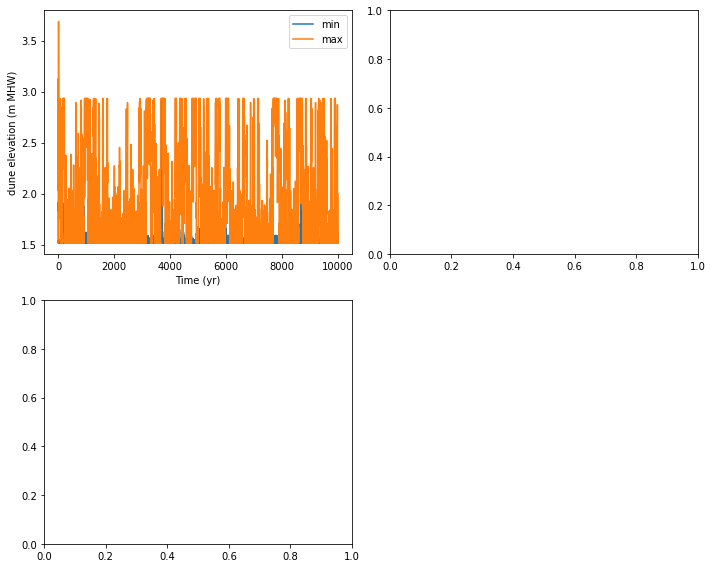

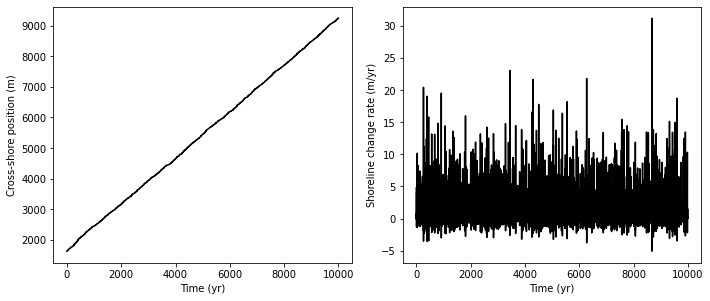

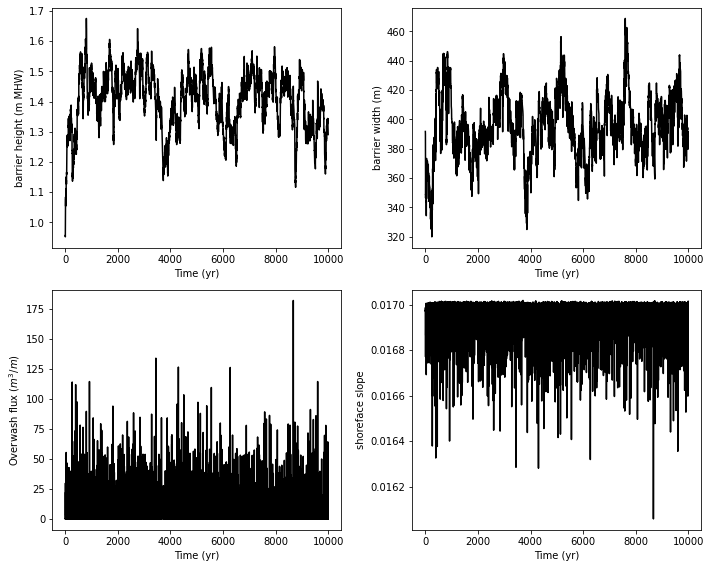

In [2]:
ib3d = 0
tmin = 0
tmax = 10000

name_prefix = "4-B3D_noAST_Rave_pt45_SLR_pt004_10k-yrs_04"
output = np.load(datadir + name_prefix + ".npz", allow_pickle=True)
cascade = output["cascade"][0]
(
    BarrierWidth_45,
    DuneCrestMean_45,
    BarrierHeight_45,
    bw_rate_45,
    bh_rate_45,
    sc_rate_45,
    DuneCrestMin_45,
    DuneCrestMax_45,
    shoreline_position,
    shoreface_slope,
    overwash,
) = cplt.plot_nonlinear_stats_RoadwayManager(cascade.barrier3d, ib3d, tmax, tmax)

In [3]:
print("min barrier elev = " + str(np.min(BarrierHeight_45)) + " m MHW") 
i_min_pt45 = np.argmin(BarrierHeight_45)
print("index = " + str(i_min_pt45)) 
print("corresponding barrier width = " + str(BarrierWidth_45[i_min_pt45]) + " m") 
print("-------------") 
print("max barrier elev = " + str(np.max(BarrierHeight_45)) + " m MHW") 
i_max_pt45 = np.argmax(BarrierHeight_45)
print("index = " + str(i_max_pt45)) 
print("corresponding barrier width = " + str(BarrierWidth_45[i_max_pt45]) + " m") 
# old, 0.9 390, 1.6 378

min barrier elev = 0.952506801327883 m MHW
index = 2
corresponding barrier width = 390.20000000000005 m
-------------
max barrier elev = 1.6754357592995106 m MHW
index = 802
corresponding barrier width = 382.8 m


The minimum doesn't work here (model spin up), so need to manually select the minimum later in the time series. Note that the barrier widths are really similar between the high and low scenarios. Not as much variability in width and height for the 0.45 case. Also note that the barrier widths for the 0.45 case are similarish to the high elevation 0.75 scenario (311 m).

In [4]:
# i_min_pt45 = 3885
i_min_pt45 = 8757
print("final min index = " + str(i_min_pt45)) 
print("min barrier elev = " + str(BarrierHeight_45[i_min_pt45]) + " m MHW") 
print("corresponding barrier width = " + str(BarrierWidth_45[i_min_pt45]) + " m") 

final min index = 8757
min barrier elev = 1.1240114983751905 m MHW
corresponding barrier width = 400.6 m


In [ ]:
fig=plt.figure(figsize=(12,8), dpi= 100)
plt.subplot(1,2,1)
plt.imshow(
    cascade.barrier3d[0]._DomainTS[i_max_pt45] * 10,
    origin="lower",
    cmap="terrain",
    vmin=-1.1,
    vmax=5.0,
)
plt.xlabel("alongshore (dam)")
plt.ylabel("cross-shore (dam)")

plt.subplot(1,2,2)
plt.imshow(
    cascade.barrier3d[0]._DomainTS[i_min_pt45] * 10,
    origin="lower",
    cmap="terrain",
    vmin=-1.1,
    vmax=5.0,
)
plt.colorbar()

In [ ]:
# with open("b3d_pt45_802yrs_high-elevations.csv", "w", newline="") as file:
#     writer = csv.writer(file)
#     writer.writerows(cascade.barrier3d[ib3d].DomainTS[i_max_pt45])  # save in decameters
# with open("b3d_pt45_802yrs_high-dunes.csv", "w", newline="") as file:
#     writer = csv.writer(file)
#     writer.writerow(
#         cascade.barrier3d[ib3d].DuneDomain[i_max_pt45, :, 0]
#     )  # save in decameters, just first row (just in case, not sure if I will ever use this)
# with open("b3d_pt45_8757yrs_low-elevations.csv", "w", newline="") as file:
#     writer = csv.writer(file)
#     writer.writerows(cascade.barrier3d[ib3d].DomainTS[i_min_pt45])  # save in decameters
# with open("b3d_pt45_8757yrs_low-dunes.csv", "w", newline="") as file:
#     writer = csv.writer(file)
#     writer.writerow(
#         cascade.barrier3d[ib3d].DuneDomain[i_min_pt45, :, 0]
#     )  # save in decameters, just first row (just in case, not sure if I will ever use this)

## Setting the initial roadway elevation at grade
Here, I calculate the average interior elevation (in m MHW) at the location of the roadway for my roadway management runs (20 meter setback). We establish the roadway at grade so it can be overwashed.

In [ ]:
pwd

In [ ]:
datadir = "../B3D_Inputs/"

# OLD VERSION, where I set the road too high
pt75_low = np.loadtxt(datadir + "b3d_pt75_3284yrs_low-elevations.csv", delimiter = ",")
print("0.75 low ave elevation = " + str(np.mean(pt75_low[2:4,:])*10) + "m MHW") 

pt75_low = np.loadtxt(datadir + "b3d_pt75_4261yrs_low-elevations.csv", delimiter = ",")
print("0.75 low ave elevation = " + str(np.mean(pt75_low[2:4,:])*10) + "m MHW") 

# pt75_high = np.loadtxt(datadir + "b3d_pt75_829yrs_high-elevations.csv", delimiter = ",")
# print("0.75 high ave elevation = " + str(np.mean(pt75_high[2:4,:])*10) + "m MHW") 

# pt45_low = np.loadtxt(datadir + "b3d_pt45_8757yrs_low-elevations.csv", delimiter = ",")
# print("0.45 low ave elevation = " + str(np.mean(pt45_low[2:4,:])*10) + "m MHW") 

# pt45_high = np.loadtxt(datadir + "b3d_pt45_802yrs_high-elevations.csv", delimiter = ",")
# print("0.45 high ave elevation = " + str(np.mean(pt45_high[2:4,:])*10) + "m MHW") 